In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
data = fetch_california_housing()
X = data.data
y = data.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
y_train  = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler.transform(y_test.reshape(-1, 1)).ravel()

In [10]:
svr = SVR(kernel='rbf', C=100)
svr.fit(X_train, y_train)

SVR(C=100)

In [11]:
y_pred = svr.predict(X_test)

In [14]:
r2 = r2_score(y_test, y_pred)
r2

0.7551031261507648

In [15]:
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

In [16]:
y_pred_inverse

array([0.48737524, 1.36966193, 4.80918281, ..., 4.74589829, 0.73648866,
       1.66977345])

In [18]:
r2 = r2_score(y_test_inverse, y_pred_inverse)
r2

0.7551031261507648

In [20]:
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mse

0.32091506223516675

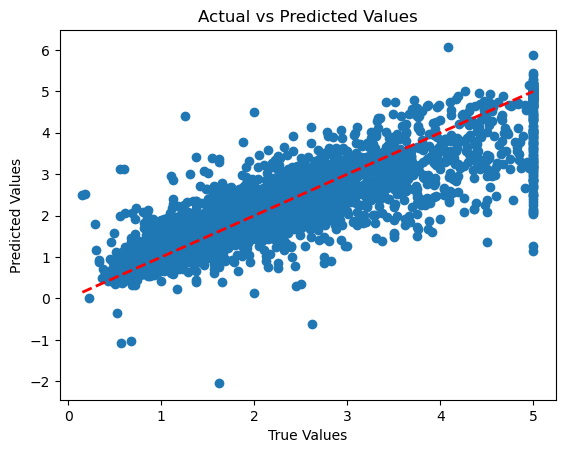

In [22]:
plt.scatter(y_test_inverse, y_pred_inverse)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# add a diagonal line
plt.plot([y_test_inverse.min(), y_test_inverse.max()], [y_test_inverse.min(), y_test_inverse.max()], 'r--', lw=2)
plt.show()
